In [2]:
import pandas as pd
import numpy as np

In [3]:
Marche = {'Apple':[75,110], 'Banana':[35,43], 'Cherry':[80,80],'Total':[230,260]}
df = pd.DataFrame(Marche, columns=['Apple','Banana','Cherry','Total'])
df.set_index([['2018','2019']],inplace=True)
df

,Apple,Banana,Cherry,Total
2018,75,35,80,230
2019,110,43,80,260


In [4]:
df['Autres'] =df['Total']-(df['Apple']+df['Banana']+df['Cherry'])
df['Autres']

2018    40
2019    27
Name: Autres, dtype: int64

In [5]:
df['Apple, %']=100*df['Apple']/df['Total']
df['Banana, %']=100*df['Banana']/df['Total']
df['Cherry, %']=100*df['Cherry']/df['Total']
df['Autres, %'] =100*df['Autres']/df['Total']
df

,Apple,Banana,Cherry,Total,Autres,"Apple, %","Banana, %","Cherry, %","Autres, %"
2018,75,35,80,230,40,32.608696,15.217391,34.782609,17.391304
2019,110,43,80,260,27,42.307692,16.538462,30.769231,10.384615


In [6]:
df_perc=df[['Apple, %','Banana, %','Cherry, %','Autres, %']]
#df_perc.rename(columns={"Apple, %":"Apple","Banana, %":"Banana","Cherry, %":"Cherry", inplace=True}
df_perc.columns = ["Apple","Banana","Cherry","Autres"]
df_perc

,Apple,Banana,Cherry,Autres
2018,32.608696,15.217391,34.782609,17.391304
2019,42.307692,16.538462,30.769231,10.384615


In [7]:
df_perc.sum(axis=1)

2018    100.0
2019    100.0
dtype: float64

In [8]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  3.0.2


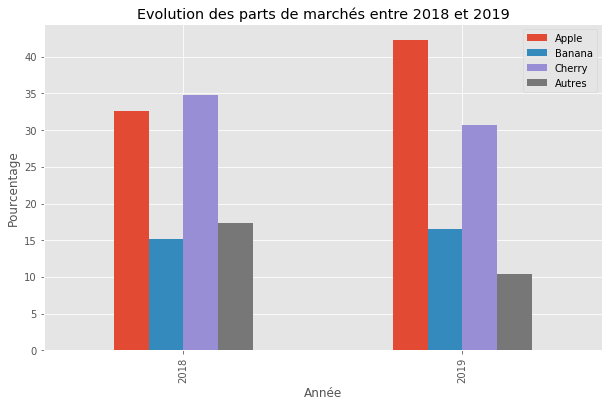

In [9]:
# step 2: plot data
df_perc.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Année') # add to x-label to the plot
plt.ylabel('Pourcentage') # add y-label to the plot
plt.title('Evolution des parts de marchés entre 2018 et 2019') # add title to the plot

plt.savefig('Evolution des parts de marchés entre 2018 et 2019.jpg', dpi=300)
plt.show()

In [10]:
df_perc_2019 = df_perc.loc[['2019']]
df_perc_2019

,Apple,Banana,Cherry,Autres
2019,42.307692,16.538462,30.769231,10.384615


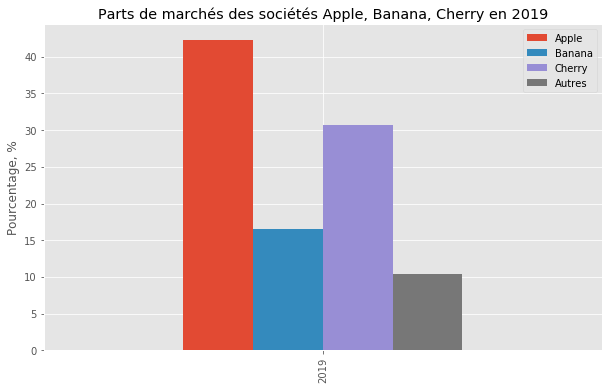

In [11]:
df_perc_2019.plot(kind='bar', figsize=(10, 6))

#plt.xlabel('Année') # add to x-label to the plot
plt.ylabel('Pourcentage, %') # add y-label to the plot
plt.title('Parts de marchés des sociétés Apple, Banana, Cherry en 2019') # add title to the plot

plt.savefig('Parts de marchés des sociétés Apple, Banana, Cherry en 2019.jpg', dpi=300)

plt.show()

In [12]:
df_perc['Apple'][0]+df_perc['Banana'][0]+df_perc['Cherry'][0]+df_perc['Autres'][0]

100.0

In [13]:
df_perc['Apple'][1]+df_perc['Banana'][1]+df_perc['Cherry'][1]+df_perc['Autres'][1]

100.0

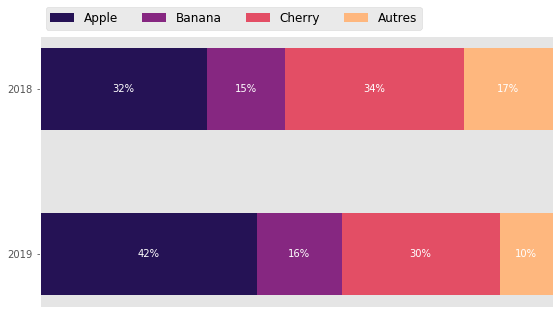

In [14]:
import matplotlib.pyplot as plt


category_names = ['Apple', 'Banana', 'Cherry','Autres']
results = {
    '2018': [df_perc['Apple'][0], df_perc['Banana'][0], df_perc['Cherry'][0],df_perc['Autres'][0]],
    '2019': [df_perc['Apple'][1], df_perc['Banana'][1], df_perc['Cherry'][1],df_perc['Autres'][1]]
}


def survey(results, category_names):
    """
    Parameters
    ----------
    results : dict
        A mapping from question labels to a list of answers per category.
        It is assumed all lists contain the same number of entries and that
        it matches the length of *category_names*.
    category_names : list of str
        The category labels.
    """
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = plt.get_cmap('magma')(#('RdYlGn')(
        np.linspace(0.15, 0.85, data.shape[1]))

    fig, ax = plt.subplots(figsize=(9.2, 5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(False)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.5,
                label=colname, color=color)
        xcenters = starts + widths / 2

        r, g, b, _ = color
        text_color = 'white' if r * g * b < 0.5 else 'darkgrey'
        for y, (x, c) in enumerate(zip(xcenters, widths)):
            ax.text(x, y, str(int(c))+"%", ha='center', va='center',
                    color=text_color)
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize='large')

    return fig, ax


survey(results, category_names)

plt.savefig('Parts de marchés des sociétés Apple, Banana, Cherry en 2018 et 2019.jpg', dpi=300)
plt.show()

In [15]:
res1=list(results.get('2019'))
res1

[42.30769230769231, 16.53846153846154, 30.76923076923077, 10.384615384615385]

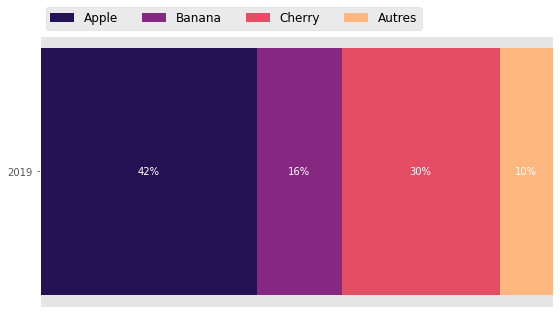

In [16]:
results1 = {
    '2019': [df_perc['Apple'][1], df_perc['Banana'][1], df_perc['Cherry'][1], df_perc['Autres'][1]]
}


survey(results1, category_names)
plt.savefig('Parts de marchés des sociétés Apple, Banana, Cherry en 2019.jpg', dpi=300)
plt.show()

In [17]:
for (key, value) in results.items():
    print (key, value)

2018 [32.608695652173914, 15.217391304347826, 34.78260869565217, 17.391304347826086]
2019 [42.30769230769231, 16.53846153846154, 30.76923076923077, 10.384615384615385]


In [18]:
df['Apple, Diff']=100*(df['Apple'][1]-df['Apple'][0])/df['Apple'][0]
df['Banana, Diff']=100*(df['Banana'][1]-df['Banana'][0])/df['Banana'][0]
df['Cherry, Diff']=100*(df['Cherry'][1]-df['Cherry'][0])/df['Cherry'][0]
df['Autres, Diff']=100*(df['Autres'][1]-df['Autres'][0])/df['Autres'][0]
df

,Apple,Banana,Cherry,Total,Autres,"Apple, %","Banana, %","Cherry, %","Autres, %","Apple, Diff","Banana, Diff","Cherry, Diff","Autres, Diff"
2018,75,35,80,230,40,32.608696,15.217391,34.782609,17.391304,46.666667,22.857143,0.0,-32.5
2019,110,43,80,260,27,42.307692,16.538462,30.769231,10.384615,46.666667,22.857143,0.0,-32.5


In [19]:
df_diff=df[['Apple, Diff','Banana, Diff','Cherry, Diff','Autres, Diff']].loc[['2019']]
df_diff

,"Apple, Diff","Banana, Diff","Cherry, Diff","Autres, Diff"
2019,46.666667,22.857143,0.0,-32.5


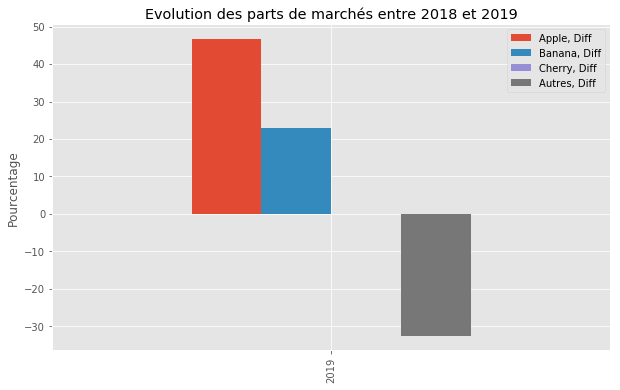

In [20]:
# step 2: plot data
df_diff.plot(kind='bar', figsize=(10, 6))

#plt.xlabel('') # add to x-label to the plot
plt.ylabel('Pourcentage') # add y-label to the plot
plt.title('Evolution des parts de marchés entre 2018 et 2019') # add title to the plot

plt.savefig('Evolution des parts de marchés entre 2018 et 2019 ver2.jpg', dpi=300)
plt.show()

In [21]:
df_diff.iloc[0]

Apple, Diff     46.666667
Banana, Diff    22.857143
Cherry, Diff     0.000000
Autres, Diff   -32.500000
Name: 2019, dtype: float64

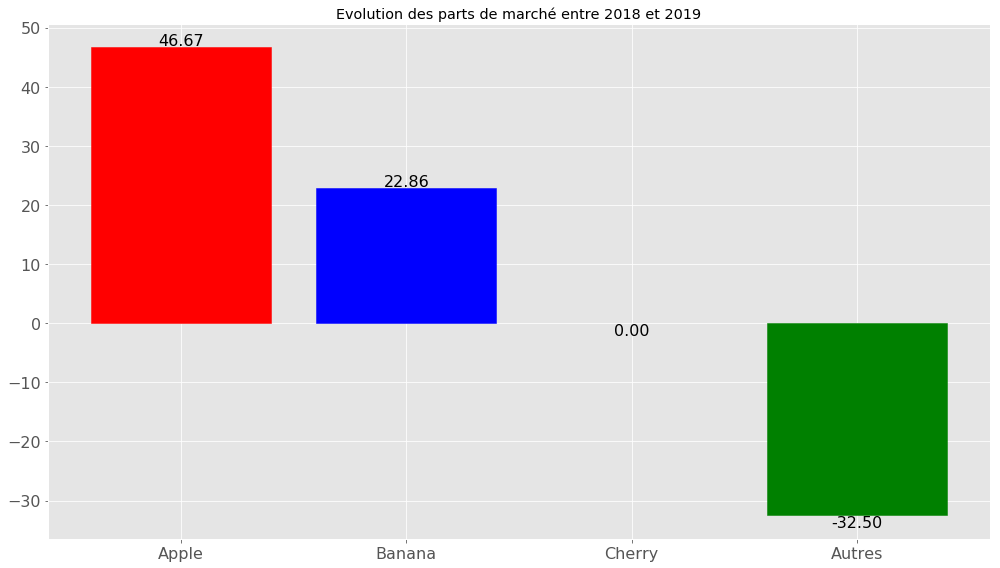

In [32]:
labels = ['Apple', 'Banana', 'Cherry', 'Autres']
vals = df_diff.iloc[0]

# the label locations
x = np.arange(0,4,1) #len(labels))  
# the width of the bars
width = 0.8  

fig, ax = plt.subplots(figsize=(14, 8))

rects1 = ax.bar(x, vals, width)

for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
             ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(16)

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('')
ax.set_title('Evolution des parts de marché entre 2018 et 2019')
ax.set_xticks(x)
ax.set_xticklabels(labels)
#ax.legend()

ax.get_children()[0].set_color('r') 
ax.get_children()[1].set_color('b') 
#ax.get_children()[2].set_color('g') 
ax.get_children()[3].set_color('g') 

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        if (height>0):
            #ax.annotate('{:.2f}'.format(height),
                        #xy=(rect.get_x() + rect.get_width() / 2, height),
                        #xytext=(0, 3),  # 3 points vertical offset
                        #textcoords="offset points",
                        #ha='center', va='bottom')
            ax.text(rect.get_x() + rect.get_width() / 2, height+0.4, '{:.2f}'.format(height),
                        horizontalalignment='center',fontsize=16)
        else:
              #ax.annotate('{:.2f}'.format(height),
                        #xy=(rect.get_x() + rect.get_width() / 2, height),
                        #xytext=(0, -14),  # 3 points vertical offset
                        #textcoords="offset points",
                        #ha='center', va='bottom')
            ax.text(rect.get_x() + rect.get_width() / 2, height-2.05, '{:.2f}'.format(height),
                        horizontalalignment='center',fontsize=16)
         


autolabel(rects1)

fig.tight_layout()

plt.savefig('Evolution des parts de marchés entre 2018 et 2019 ver3.jpg', dpi=300)

plt.show()